In [26]:
import numpy as np
import matplotlib.pyplot as plt
from random import random as rnd

# Metodo de la transformada inversa

## Distribucion de Weibull

### Funcion de densidad de probabilidad

\begin{equation}
\operatorname{We}(x;\alpha, \lambda) = \begin{cases}
\frac{\alpha}{\lambda} \left(\frac{x}{\lambda}\right)^{\alpha - 1} e^{-\left(\frac{x}{\lambda}\right)^{\alpha}} & \text{si } x \geq 0, \\ 
0 & \text{si } x < 0.
\end{cases}
\end{equation}

### Funcion de distribucion acumulada

\begin{equation}
F(x;\alpha, \lambda) = \begin{cases}
1 - e^{-\left(\frac{x}{\lambda}\right)^{\alpha}} & \text{si } x \geq 0, \\
0 & \text{si } x < 0.
\end{cases}
\end{equation}

### Funcion de distribucion acumulada inversa:

\begin{equation}
F^{-1}(y;\alpha, \lambda) = \lambda \Big[\ln\Big(\frac{1}{1 - y}\Big)\Big]^{1/\alpha}
\end{equation}


In [27]:
def inverse_weibull(y, forma, escala):
    if y <= 0 or y >= 1:
        raise ValueError("y debe ser un valor entre 0 y 1")
    else:
        return (escala * np.log(1 / (1 - y))) ** (1 / forma)

### Generador de numeros aleatorios (Weibull)

In [28]:
def muestreo_weibull(n, forma, escala):
    y = [rnd() for i in range(n)]
    x = [inverse_weibull(i, forma, escala) for i in y]
    return x

### Grafica

Text(0, 0.5, 'Densidad de probabilidad')

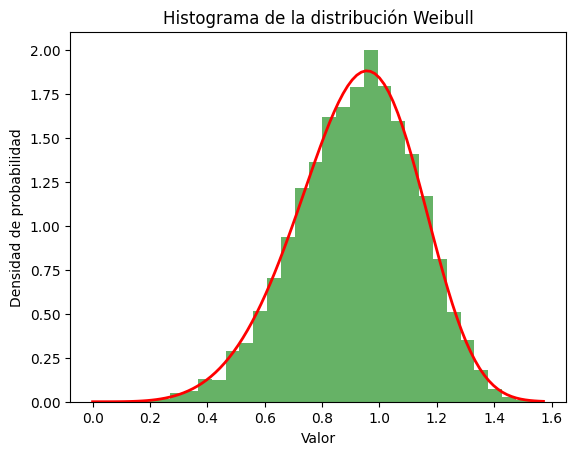

In [29]:
alpha = 5
theta = 1

rand_values = muestreo_weibull(10000, alpha, theta)
plt.hist(rand_values, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(0, max(rand_values), 100)
plt.plot(x, (alpha / theta) * (x / theta) ** (alpha - 1) * np.exp(-(x / theta) ** alpha), 'r-', lw=2)
plt.title('Histograma de la distribución Weibull')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')


## Distribucion de Gumbel

### Funcion de densidad de probabilidad

\begin{equation}
\operatorname{Gu}(x;\mu, \beta) = \frac{1}{\beta} e^{-\left(\frac{x - \mu}{\beta} + e^{-\left(\frac{x - \mu}{\beta}\right)}\right)}
\end{equation}

### Funcion de distribucion acumulada

\begin{equation}
F(x;\mu, \beta) = e^{-e^{-\left(\frac{x - \mu}{\beta}\right)}} 
\end{equation}

### Funcion de distribucion acumulada inversa:

\begin{equation}
F^{-1}(y;\mu, \beta) = \mu - \beta \ln(-\ln(y))
\end{equation}

In [30]:
def inverse_gumbel(y, mu, beta):
    if y <= 0 or y >= 1:
        raise ValueError("y debe ser un valor entre 0 y 1")
    else:
        return mu - beta * np.log(-np.log(y))

In [31]:
def muestreo_gumbel(n, mu, beta):
    y = [rnd() for i in range(n)]
    x = [inverse_gumbel(i, mu, beta) for i in y]
    return x

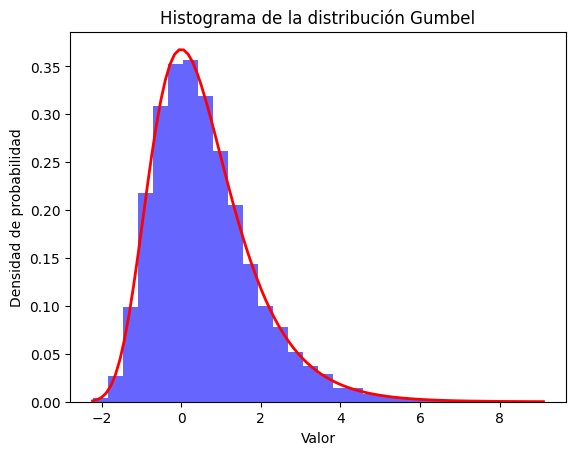

In [91]:
mu = 0
beta = 1

rand_values_gumbel = muestreo_gumbel(10000, 0, 1)

plt.figure()
plt.hist(rand_values_gumbel, bins=30, density=True, alpha=0.6, color='b')
x_gumbel = np.linspace(min(rand_values_gumbel), max(rand_values_gumbel), 100)
plt.plot(x_gumbel, (1 / beta) * np.exp(-(x_gumbel - mu) / beta) * np.exp(-np.exp(-(x_gumbel - mu) / beta)), 'r-', lw=2)
plt.title('Histograma de la distribución Gumbel')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.show()

## Distribucion de Cauchy

### Funcion de densidad de probabilidad

\begin{equation}
    \operatorname{Ca}(x; x_0, \gamma) = \frac{1}{\pi \gamma \left[1 + \left(\frac{x - x_0}{\gamma}\right)^2\right]}
\end{equation}

### Funcion de distribucion acumulada

\begin{equation}
    F(x; x_0, \gamma) = \frac{1}{2} + \frac{1}{\pi} \tan^{-1}\left(\frac{x - x_0}{\gamma}\right)
\end{equation}

### Funcion de distribucion acumulada inversa:

\begin{equation}
    F^{-1}(y; x_0, \gamma) = x_0 + \gamma \tan\left(\pi\Big(y - \frac{1}{2}\Big)\right)
\end{equation}


In [53]:
def inverse_cauchy(y, x0, gamma):   
    return x0 + gamma * np.tan(np.pi * (y - 0.5))

In [54]:
def muestreo_cauchy(n, x0, gamma):
    y = [rnd() for i in range(n)]
    x = [inverse_cauchy(i, x0, gamma) for i in y]
    return x

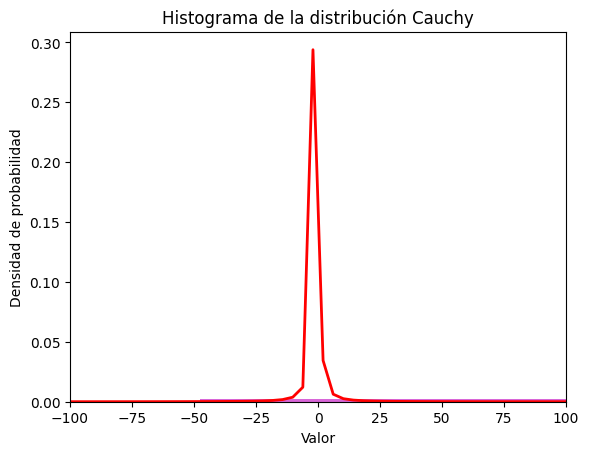

In [270]:
x0 = 0
gamma = 1

rand_values_cauchy = muestreo_cauchy(10000, x0, gamma)

plt.figure()  
plt.hist(rand_values_cauchy, bins=100, density=True, alpha=0.6, color='m')
plt.xlim(-100,100)  # Limitar el eje x para una mejor visualización
x_cauchy = np.linspace(-100, 100)
plt.plot(x_cauchy, 1/(np.pi * gamma * (1 + ((x_cauchy - x0)/gamma))**2), 'r-', lw=2)
plt.title('Histograma de la distribución Cauchy')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.show()

## Ejercicios

1. 
$$
f(x) = 
\begin{cases} 
  \dfrac{3x^{2}}{2} & \text{si } -1 \leq x \leq 1 \\
  0 & \text{en otro caso}
\end{cases}
$$
\\

$$
F(x) = 
\begin{cases}
    \frac{1}{2}\Big(x^3 + 1\Big) & \text{si } -1 \leq x < -1 \\
    0 & \text{en otro caso} \\
\end{cases}
$$
\
$$
F^{-1}(y) = \sqrt[3]{2y - 1}
$$

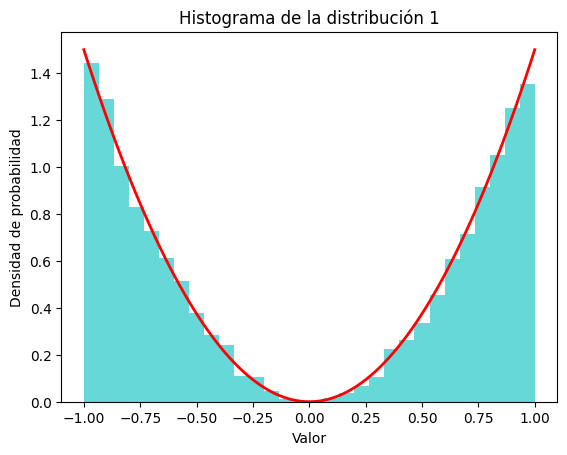

In [274]:
def inverse_1 (y):
    if y <= 0 or y >= 1:
        raise ValueError("y debe ser un valor entre 0 y 1")
    else:
        return np.cbrt(2*y - 1)
    
def muestreo_1(n):
    y = [rnd() for i in range(n)]
    x = [inverse_1(i) for i in y]
    return x

rand_values_1 = muestreo_1(10000)
plt.figure()
plt.hist(rand_values_1, bins=30, density=True, alpha=0.6, color='c')
x_1 = np.linspace(-1, 1, 100)
plt.plot(x_1, 3 * (x_1**2)/2, 'r-', lw=2)
plt.title('Histograma de la distribución 1')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.show()